In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
tha = pd.read_csv('./data/avocado.csv').drop('Unnamed: 0',1)

In [20]:
tha.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

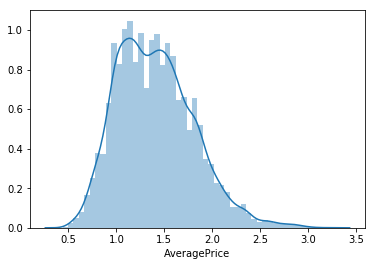

In [21]:
sns.distplot(tha.AveragePrice)

In [6]:
X = tha[['Total Volume','4046','4225','4770',
         'Total Bags','Small Bags','Large Bags',
         'XLarge Bags','type','region']]
X = pd.get_dummies(X)

In [7]:
tmp = pd.to_datetime(tha.Date)
min_date = min(tmp)

In [8]:
min_date

Timestamp('2015-01-04 00:00:00')

In [9]:
def get_int_val(x):
    dt_x = pd.to_datetime(x)
    val = dt_x - min_date
    return val.days

In [10]:
X['date'] = tha.Date.map(lambda x: get_int_val(x))

In [11]:
X.head()

Total Volume     4046       4225    4770  Total Bags  Small Bags  \
0      64236.62  1036.74   54454.85   48.16     8696.87     8603.62   
1      54876.98   674.28   44638.81   58.33     9505.56     9408.07   
2     118220.22   794.70  109149.67  130.50     8145.35     8042.21   
3      78992.15  1132.00   71976.41   72.58     5811.16     5677.40   
4      51039.60   941.48   43838.39   75.78     6183.95     5986.26   

   Large Bags  XLarge Bags  type_conventional  type_organic  ...   \
0       93.25          0.0                  1             0  ...    
1       97.49          0.0                  1             0  ...    
2      103.14          0.0                  1             0  ...    
3      133.76          0.0                  1             0  ...    
4      197.69          0.0                  1             0  ...    

   region_SouthCentral  region_Southeast  region_Spokane  region_StLouis  \
0                    0                 0               0               0   
1                    0                 0               0               0   
2                    0                 0               0               0   
3                    0                 0               0               0   
4                    0                 0               0               0   

   region_Syracuse  region_Tampa  region_TotalUS  region_West  \
0                0             0               0            0   
1                0             0               0            0   
2                0             0               0            0   
3                0             0               0            0   
4                0             0               0            0   

   region_WestTexNewMexico  date  
0                        0   357  
1                        0   350  
2                        0   343  
3                        0   336  
4                        0   329  

[5 rows x 65 columns]

In [12]:
Y = tha.AveragePrice

In [13]:
from sklearn.manifold import TSNE

In [14]:
model = TSNE(learning_rate=100)
transformed = model.fit_transform(X)

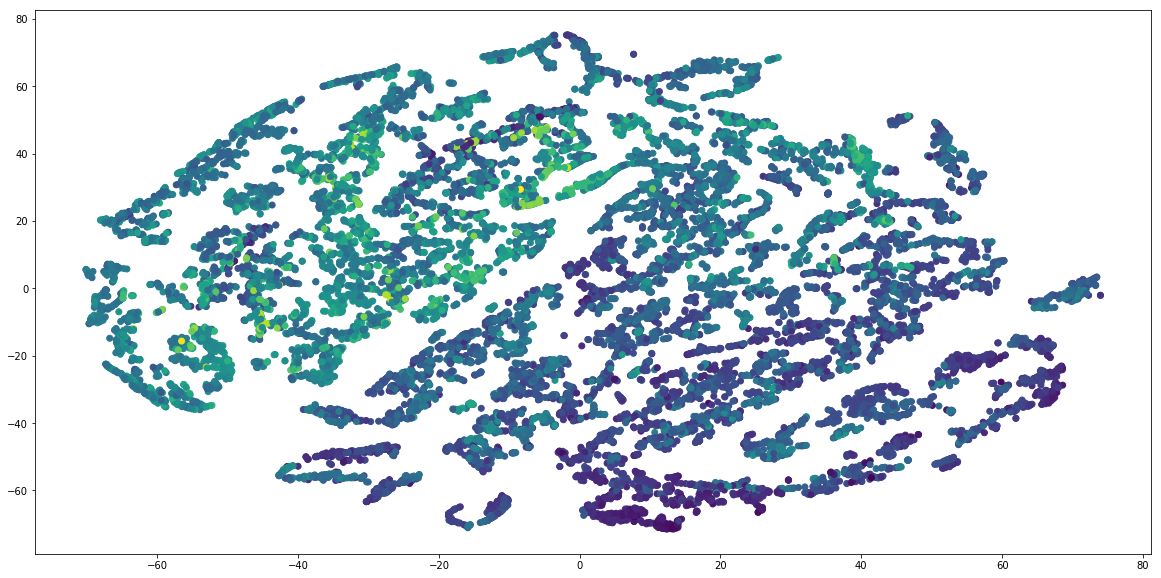

In [17]:
# Plotting 2d t-Sne
plt.figure(figsize=(20,10))
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis, c=Y)
plt.show()

In [19]:
pd.DataFrame(transformed).to_csv("tsne_fransformed_output.csv",index=False)